# Assignment 1
# Zohair Mubasheer Ahmed
# 8897082

**Assignment 1**
**CSCN8000 Artificial Intelligence Algorithms and Mathematics**

1.	Given the symptoms exhibited in a patient and a database of anonymized patient records, predict whether the patient is likely to have an illness (Parkinson’s disease).
    A model of this decision problem could be used by a program to provide decision support to medical professionals.
  	
   You can follow the following steps :
  	
   •	Data Analysis
  	
   •	Data Preprocessing
  	
   •	Data Standardization
  	
   •	Model Training
  	
   •	Measure your model’s accuracy.
  	
      a.	Use 80% of samples as training data size.

   •	Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.
  	
You can download the Dataset from: https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification  
Notes:
This lab should be submitted as a notebook and an HTML. Follow https://docs.github.com/en/pages/quickstart. 


- Importing the required libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

- Load the dataset into a Dataframe

In [45]:
dataset = pd.read_csv('D:/Conestoga/AAA/Assignment 1/pd_speech_features.csv', header=1)

### Preprocessing the Dataset

- Displaying the dataset

In [46]:
dataset.describe()

id      gender         PPE         DFA        RPDE   numPulses   
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000  \
mean   125.500000    0.515873    0.746284    0.700414    0.489058  323.972222   
std     72.793721    0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.000000    0.041551    0.543500    0.154300    2.000000   
25%     62.750000    0.000000    0.762833    0.647053    0.386537  251.000000   
50%    125.500000    1.000000    0.809655    0.700525    0.484355  317.000000   
75%    188.250000    1.000000    0.834315    0.754985    0.586515  384.250000   
max    251.000000    1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter   
count        756.000000        756.000000          756.000000    756.000000  \
mean         322.678571          0.006360            0.000383      0.002324   
std           99.402499          0.001826            0.000728      0.002628   
min            1.000000          0.002107            0.000011      0.000210   
25%          250.000000          0.005003            0.000049      0.000970   
50%          316.000000          0.006048            0.000077      0.001495   
75%          383.250000          0.007528            0.000171      0.002520   
max          905.000000          0.012966            0.003483      0.027750   

       ...  tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29   
count  ...                 756.000000                 756.000000  \
mean   ...                  26.237251                  22.840337   
std    ...                  42.220693                  32.626464   
min    ...                   1.509800                   1.531700   
25%    ...                   2.408675                   3.452800   
50%    ...                   5.586300                   7.062750   
75%    ...                  28.958075                  29.830850   
max    ...                 239.788800                 203.311300   

       tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31   
count                 756.000000                 756.000000  \
mean                   18.587888                  13.872018   
std                    25.537464                  20.046029   
min                     1.582900                   1.747200   
25%                     3.354825                   3.077450   
50%                     6.077400                   4.770850   
75%                    21.944050                  13.188000   
max                   121.542900                 102.207000   

       tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33   
count                 756.000000                 756.000000  \
mean                   12.218953                  12.375335   
std                    17.783642                  16.341665   
min                     1.789500                   1.628700   
25%                     2.937025                   3.114375   
50%                     4.300450                   4.741450   
75%                    10.876150                  12.201325   
max                    85.571700                  73.532200   

       tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35   
count                 756.000000                 756.000000  \
mean                   14.799230                  14.751559   
std                    15.722502                  14.432979   
min                     1.861700                   1.955900   
25%                     3.665925                   3.741275   
50%                     6.725700                   7.334250   
75%                    21.922050                  22.495175   
max                    62.007300                  57.544300   

       tqwt_kurtosisValue_dec_36       class  
count                 756.000000  756.000000  
mean                   31.481110    0.746032  
std                    34.230991    0.435568  
min                     2.364000    0.000000  
25%                  

- Exploring the Dataset

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


- Identify if there are any missing values

In [48]:
print(dataset.isnull().sum())

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


### Check for duplicate rows

In [49]:
print(f"Count of Duplicate rows = {dataset.duplicated().sum()}")

Count of Duplicate rows = 1


- Eliminating Duplicate Values

In [50]:
dataset = dataset.drop_duplicates()
print(f"Count of duplicate rows = {dataset.duplicated().sum()}")

Count of duplicate rows = 0


- Determining the shape of the dataset

In [51]:
print("Shape of the Dataset", dataset.shape)

Shape of the Dataset (755, 755)


- Normalizing the dataset values to fit a specific datatype

In [52]:
dataset = dataset.apply(pd.to_numeric, errors='coerce')
dataset.dtypes

id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object

- Creating a correlation matrix for all the attributes in the dataset

<Axes: >

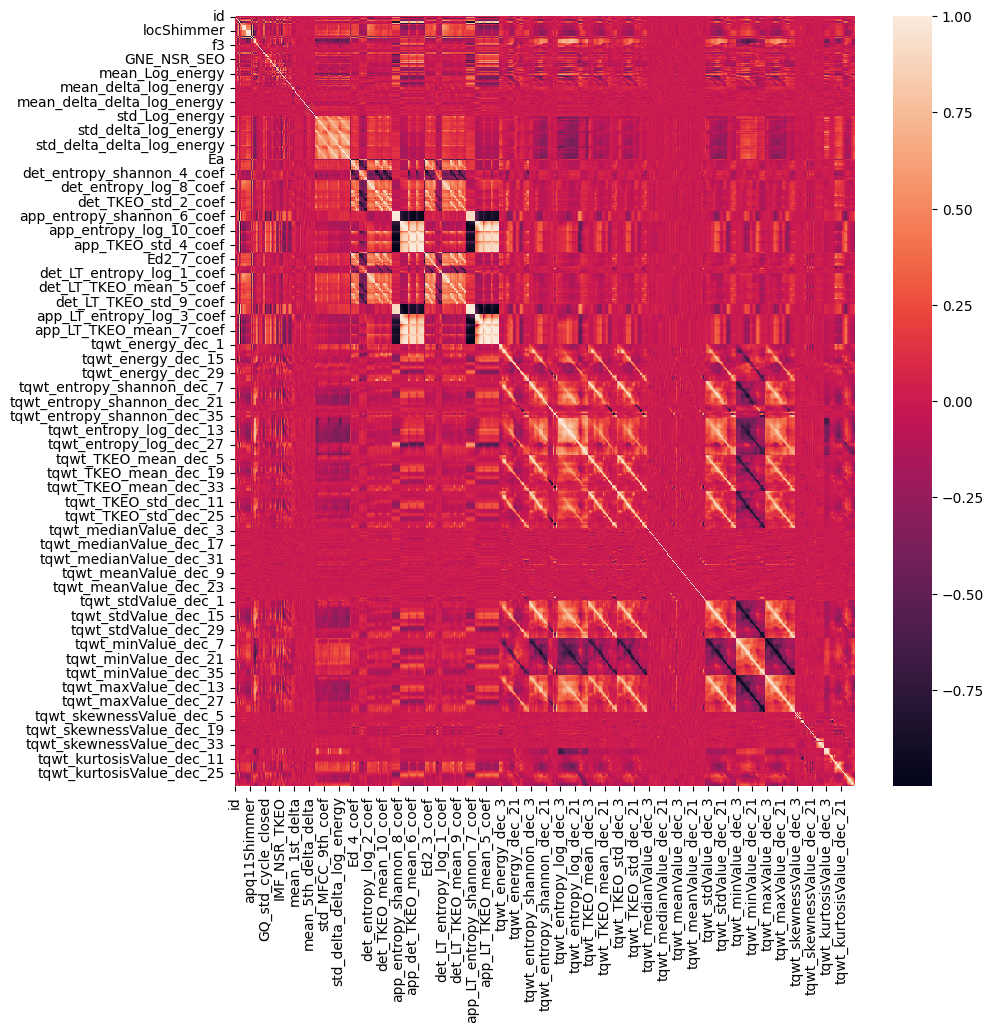

In [53]:
correlations = dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlations)

- Grouping the data according to the id

In [54]:
dataset= dataset.groupby('id').mean().reset_index()
dataset

id  gender       PPE       DFA      RPDE   numPulses  numPeriodsPulses   
0      0     1.0  0.823387  0.696370  0.567250  235.333333        234.333333  \
1      1     0.0  0.415637  0.793993  0.592453  213.333333        211.000000   
2      2     1.0  0.801973  0.619967  0.520563  319.333333        318.333333   
3      3     0.0  0.828707  0.626097  0.537183  493.000000        492.000000   
4      4     0.0  0.831287  0.779397  0.726717  362.666667        361.666667   
..   ...     ...       ...       ...       ...         ...               ...   
247  247     0.0  0.751703  0.651830  0.586847  326.000000        324.666667   
248  248     1.0  0.611750  0.688327  0.452343  356.666667        355.333333   
249  249     1.0  0.819857  0.788800  0.373520  339.666667        338.666667   
250  250     0.0  0.600530  0.569010  0.411987  402.333333        401.000000   
251  251     0.0  0.844917  0.745653  0.476707  353.666667        352.666667   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
0            0.008220            0.000073      0.001963  ...  \
1            0.008884            0.001849      0.005790  ...   
2            0.006041            0.000104      0.002217  ...   
3            0.003913            0.000042      0.000757  ...   
4            0.005622            0.002023      0.003593  ...   
..                ...                 ...           ...  ...   
247          0.005911            0.000251      0.003193  ...   
248          0.005410            0.000964      0.002467  ...   
249          0.005684            0.000042      0.000800  ...   
250          0.004775            0.000103      0.000983  ...   
251          0.005475            0.000065      0.000820  ...   

     tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29   
0                     1.561733                   2.862000  \
1                     4.918567                   4.827133   
2                    41.129400                  31.201933   
3                     1.677633                   1.908400   
4                     4.104600                   4.285233   
..                         ...                        ...   
247                  19.298667                  15.072200   
248                   4.448533                   3.180933   
249                  90.482767                  65.641367   
250                   2.674667                   2.714200   
251                  44.571367                  26.370167   

     tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31   
0                    12.293333                   9.717500  \
1                     6.117633                   8.599667   
2                    14.584467                   5.446800   
3                     2.842167                   3.493867   
4                     2.953200                   2.799933   
..                         ...                        ...   
247                  13.479700                  14.877933   
248                   2.880233                   2.805067   
249                  29.098533                   8.966500   
250                   2.706000                   2.637700   
251                  14.782567                   4.455833   

     tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33   
0                     9.055300                   6.259100  \
1                     5.737233                   7.933133   
2                     3.462000                   4.772067   
3                     3.282433                   3.085267   
4                     2.645100                   2.811367   
..                         ...                        ...   
247                  22.053767                  20.532267   
248                   2.872667                   3.071367   
249                   6.558600                  11.885633   
250                   3.816233                   3.421233   
251                   2.621600                   2.514667   

     tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35   
0               

- Grouping the Dataset by Gender (0 for male and 1 for female)

In [55]:
dataset['gender']= dataset['gender'].astype(int)
groupByGender = dataset.groupby('gender')['class'].sum().reset_index()
groupByGender

gender  class
0       0   81.0
1       1  107.0

- Stadardizing the Dataset (need to remove the gender and class before stadardization and add them after)

In [56]:
gender = dataset['gender']
class_label = dataset['class']
dataset_after_removing_gender_class = dataset.drop(columns=['gender', 'class'])
scaler = StandardScaler()
scaledDataset = pd.DataFrame(scaler.fit_transform(dataset_after_removing_gender_class), columns=dataset_after_removing_gender_class.columns)
scaledDataset['gender'] = gender.values
scaledDataset['class'] = class_label.values

- Train/Test Split at 80-20

In [57]:
X = scaledDataset.drop(columns=['class'])
y = scaledDataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

### Support Vector Machine Model

In [58]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

- Generating the predictions

In [59]:
y_pred = model_svm.predict(X_test)

- Evaluating the precision, recall and accuracy of the SVM model and genrating a confusion matrix

In [60]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM f1_score:", f1)
print("SVM Accuracy :", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)

SVM Precision: 0.9302325581395349
SVM Recall: 0.8888888888888888
SVM f1_score: 0.9090909090909092
SVM Accuracy : 0.8431372549019608
Confusion Matrix:
[[ 3  3]
 [ 5 40]]


- Plotting the Confusion Matrix

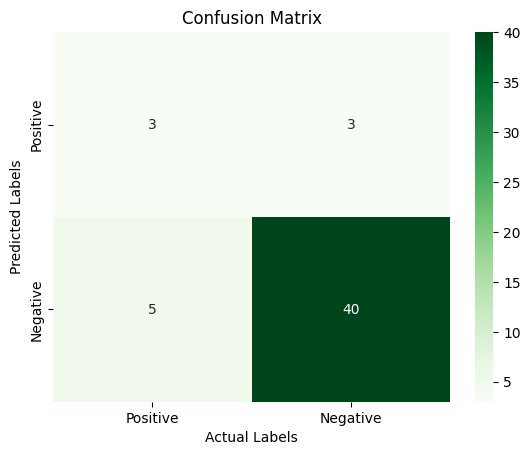

In [61]:
sns.heatmap(confusion_mat, annot=True, cmap='Greens', fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])

plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

Comments

With an accuracy of 84.31% it can be interpreted as the model has been fairly accurate in determinig the patients with parkinson's disease.

- Performing cross validation

In [62]:
cross_val_scores = cross_val_score(model_svm, X_train, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42))
for i, score in enumerate(cross_val_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
print("Average Accuracy:", cross_val_scores.mean())
print("Cross-validation accuracy score:", cross_val_scores)

precision_scorer = make_scorer(precision_score)

cross_val_scores = cross_val_score(model_svm, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=58))

print("Cross-validation Precision Scores:", cross_val_scores)
print("Average Precision:", cross_val_scores.mean())

Fold 1 - Accuracy: 0.86
Fold 2 - Accuracy: 0.90
Fold 3 - Accuracy: 0.80
Fold 4 - Accuracy: 0.65
Fold 5 - Accuracy: 0.90
Fold 6 - Accuracy: 0.80
Fold 7 - Accuracy: 0.80
Fold 8 - Accuracy: 0.75
Fold 9 - Accuracy: 0.60
Fold 10 - Accuracy: 0.65
Average Accuracy: 0.7707142857142857
Cross-validation accuracy score: [0.85714286 0.9        0.8        0.65       0.9        0.8
 0.8        0.75       0.6        0.65      ]
Cross-validation Precision Scores: [0.73170732 0.775      0.85       0.825      0.725     ]
Average Precision: 0.7813414634146342


In [72]:
single_instance = pd.DataFrame(scaledDataset.drop(['class'],axis=1).iloc[12,]).T
prediction = model_svm.predict(single_instance)
print("Predicted class for the single instance:", prediction[0])

Predicted class for the single instance: 1.0


## Closing Comments

I used a dataset including speech characteristics from 188 Parkinson's patients (107 men and 81 women) and a control group of 64 healthy people (23 men and 41 women) for this investigation. The Department of Neurology at Istanbul University's Cerrahpaşa Faculty of Medicine provided the information. The dataset has 754 variables that represented different speech signal processing techniques used on recordings of people with Parkinson's disease (PD).

## Conclusion

My research revealed that the Support Vector Machine model could reasonably detect the presence of Parkinson's disease using the dataset's speech attributes. However, the model has not shown any encouraging advances as a result of the cross validation approach. Such a model's precision, recall, and accuracy have shown great promise, and the results obtained after comprehensive model evaluation were essential in choosing the SVM model which has led to a very accurate prediction as evident from a single instance. 